In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [3]:
df=pd.read_excel("/content/drive/MyDrive/car/Untitled folder/Sports Data.xlsx")

In [4]:
df.head()

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
1,Game_2,Win,24.0,Day,T20,3.0,1,4.0,Batting,Zimbabwe,...,12.0,1,0.0,0,3.0,6.0,0,69.0,2,1
2,Game_3,Loss,24.0,Day and Night,T20,3.0,1,2.0,Bowling,Zimbabwe,...,14.0,4,0.0,0,3.0,6.0,0,69.0,3,1
3,Game_4,Win,24.0,NaN,ODI,2.0,1,2.0,Bowling,Kenya,...,15.0,4,0.0,2,3.0,6.0,0,73.0,3,1
4,Game_5,Loss,24.0,Night,ODI,1.0,1,3.0,Bowling,Srilanka,...,12.0,4,0.0,0,3.0,6.0,0,80.0,3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [6]:
df.shape

(2930, 23)

In [7]:
df.isnull().sum()

Game_number                0
Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_team_Age,2833.0,29.242852,2.264230,12.0,30.0,30.0,30.00,70.0
Bowlers_in_team,2848.0,2.913624,1.023907,1.0,2.0,3.0,4.00,5.0
Wicket_keeper_in_team,2930.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
All_rounder_in_team,2890.0,2.722491,1.092699,1.0,2.0,3.0,4.00,4.0
Audience_number,2849.0,46267.960688,48599.581459,7063.0,20363.0,34349.0,57876.00,1399930.0
Max_run_scored_1over,2902.0,15.199862,3.661010,11.0,12.0,14.0,18.00,25.0
Max_wicket_taken_1over,2930.0,2.713993,1.080623,1.0,2.0,3.0,4.00,4.0
Extra_bowls_bowled,2901.0,11.252671,7.780829,0.0,6.0,10.0,15.00,40.0
Min_run_given_1over,2930.0,1.952560,1.678332,0.0,0.0,2.0,3.00,6.0
Min_run_scored_1over,2903.0,2.762659,0.705759,1.0,2.0,3.0,3.00,4.0


In [9]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run
Avg_team_Age,1.000000,0.239524,NaN,0.003667,0.157937,0.007140,0.016765,0.331165,-0.015398,0.001008,0.183204,0.192347,0.035882
Bowlers_in_team,0.239524,1.000000,NaN,-0.031913,0.084663,-0.012641,-0.012326,0.156708,-0.018681,0.011962,0.074960,0.061980,0.014550
Wicket_keeper_in_team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
All_rounder_in_team,0.003667,-0.031913,NaN,1.000000,-0.002208,-0.028473,0.003227,-0.004400,0.009163,0.025905,-0.007503,0.016759,-0.047249
Audience_number,0.157937,0.084663,NaN,-0.002208,1.000000,-0.021801,-0.012835,0.573738,-0.003818,0.025664,0.435883,0.314225,-0.008521
Max_run_scored_1over,0.007140,-0.012641,NaN,-0.028473,-0.021801,1.000000,-0.041149,-0.016948,0.009597,-0.009005,-0.027542,0.001989,-0.010614
Max_wicket_taken_1over,0.016765,-0.012326,NaN,0.003227,-0.012835,-0.041149,1.000000,0.023237,0.038825,0.021040,0.033495,-0.014421,0.001671
Extra_bowls_bowled,0.331165,0.156708,NaN,-0.004400,0.573738,-0.016948,0.023237,1.000000,0.003496,0.003094,0.620163,0.459354,-0.000690
Min_run_given_1over,-0.015398,-0.018681,NaN,0.009163,-0.003818,0.009597,0.038825,0.003496,1.000000,-0.025898,-0.008762,-0.028952,-0.011901
Min_run_scored_1over,0.001008,0.011962,NaN,0.025905,0.025664,-0.009005,0.021040,0.003094,-0.025898,1.000000,0.013315,0.051595,-0.007939


In [10]:
df.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

In [11]:
df['Match_format'].value_counts()

ODI      1865
T20       864
Test      125
20-20       6
Name: Match_format, dtype: int64

In [12]:
df['Match_light_type'].value_counts()

Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64

In [13]:
df['Match_format'].replace('20-20','T20',inplace=True)

In [14]:
df['Match_format'].value_counts()

ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64

In [15]:
df[df['Match_format']=='Test'].sort_values(by='player_highest_run',ascending=False)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
2441,Game_2442,Win,30.0,Day,Test,4.0,1,3.0,Bowling,Australia,...,17.0,2,6.0,2,1.0,6.0,4,100.0,3,1
1297,Game_1298,Win,NaN,Day,Test,4.0,1,3.0,Bowling,Australia,...,17.0,2,6.0,2,1.0,6.0,4,100.0,3,1
2798,Game_2799,Win,30.0,Night,Test,3.0,1,1.0,Bowling,Australia,...,13.0,4,13.0,3,3.0,11.0,10,100.0,3,1
1654,Game_1655,Win,30.0,Night,Test,3.0,1,1.0,Bowling,Australia,...,13.0,4,13.0,3,3.0,11.0,10,100.0,3,1
2171,Game_2172,Win,30.0,Day and Night,Test,3.0,1,1.0,Bowling,Bangladesh,...,11.0,3,32.0,2,3.0,32.0,5,99.0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777,Game_1778,Win,NaN,Day,Test,NaN,1,3.0,Batting,Australia,...,16.0,3,9.0,2,3.0,9.0,0,31.0,3,3
2921,Game_2922,Win,30.0,Day,Test,4.0,1,3.0,Batting,Australia,...,16.0,3,9.0,2,3.0,9.0,0,31.0,3,3
740,Game_741,Win,30.0,Night,Test,3.0,1,4.0,Batting,Bangladesh,...,12.0,3,23.0,3,3.0,6.0,3,30.0,4,4
1884,Game_1885,Win,30.0,Night,Test,3.0,1,4.0,Batting,Bangladesh,...,12.0,3,23.0,3,3.0,6.0,3,30.0,4,4


In [16]:
df_obj=df.select_dtypes(include=[object])
df_obj.drop('Game_number',axis=1,inplace=True)
df_obj.columns


Index(['Result', 'Match_light_type', 'Match_format', 'First_selection',
       'Opponent', 'Season', 'Offshore', 'Players_scored_zero',
       'player_highest_wicket'],
      dtype='object')

In [17]:
feature_list=df_obj.columns
for i in range(len(feature_list)):
  print(df[feature_list[i]].value_counts())

Win     2457
Loss     473
Name: Result, dtype: int64
Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64
ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64
Bowling    1722
Batting    1138
Bat          11
Name: First_selection, dtype: int64
South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64
Rainy     1309
Summer     918
Winter     641
Name: Season, dtype: int64
No     2057
Yes     809
Name: Offshore, dtype: int64
3        1730
2         744
4         285
1         166
Three       5
Name: Players_scored_zero, dtype: int64
1        1084
2        1063
3         427
4         211
5         138
Three       7
Name: player_highest_wicket, dtype: int64


In [18]:

df['Players_scored_zero'].replace('Three', 3, inplace = True)
df['player_highest_wicket'].replace('Three', 3, inplace = True)
df['First_selection'].replace('Bat', 'Batting', inplace = True)


In [19]:
feature_list=df_obj.columns
for i in range(len(feature_list)):
  print(df[feature_list[i]].value_counts())

Win     2457
Loss     473
Name: Result, dtype: int64
Day              2041
Day and Night     541
Night             296
Name: Match_light_type, dtype: int64
ODI     1865
T20      870
Test     125
Name: Match_format, dtype: int64
Bowling    1722
Batting    1149
Name: First_selection, dtype: int64
South Africa    640
Kenya           576
Srilanka        513
England         283
Pakistan        253
Bangladesh      204
Zimbabwe        163
West Indies     158
Australia       104
Name: Opponent, dtype: int64
Rainy     1309
Summer     918
Winter     641
Name: Season, dtype: int64
No     2057
Yes     809
Name: Offshore, dtype: int64
3    1735
2     744
4     285
1     166
Name: Players_scored_zero, dtype: int64
1    1084
2    1063
3     434
4     211
5     138
Name: player_highest_wicket, dtype: int64


In [20]:
df.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

In [21]:
df_objd=df.select_dtypes(exclude=[object])
df_objd.columns

Index(['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

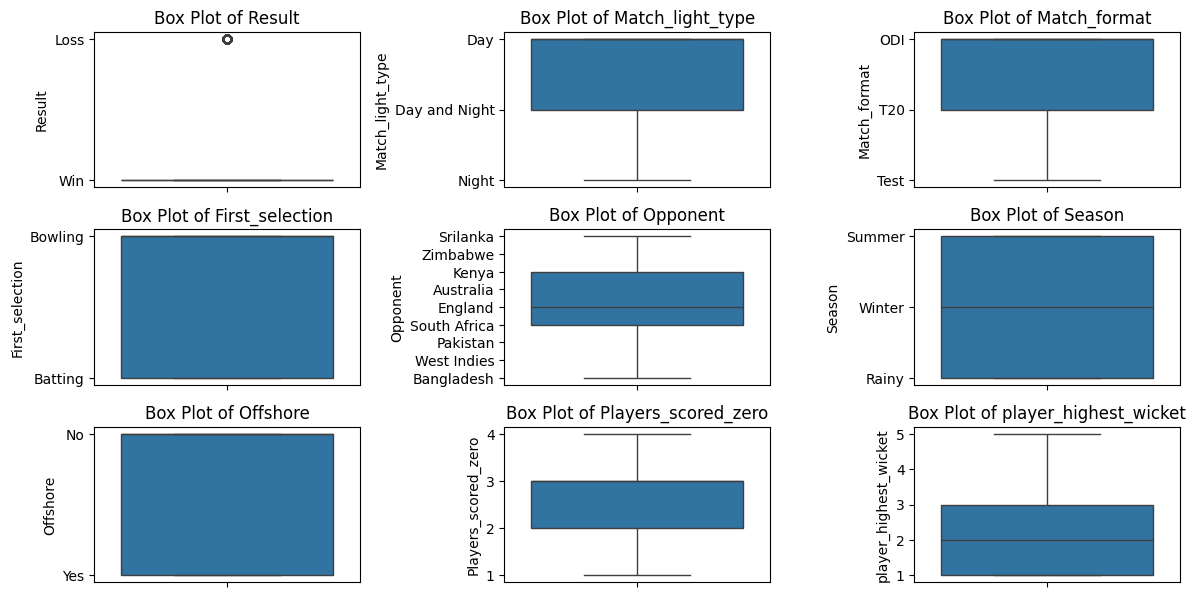

In [22]:
plt.figure(figsize=(12,8))
feature_list=df_obj.columns
for i in range(len(feature_list)):
  plt.subplot(4,3,i+1)
  sns.boxplot(y=df[feature_list[i]],data=df)
  plt.title('Box Plot of {}'.format(feature_list[i]))
  plt.tight_layout()

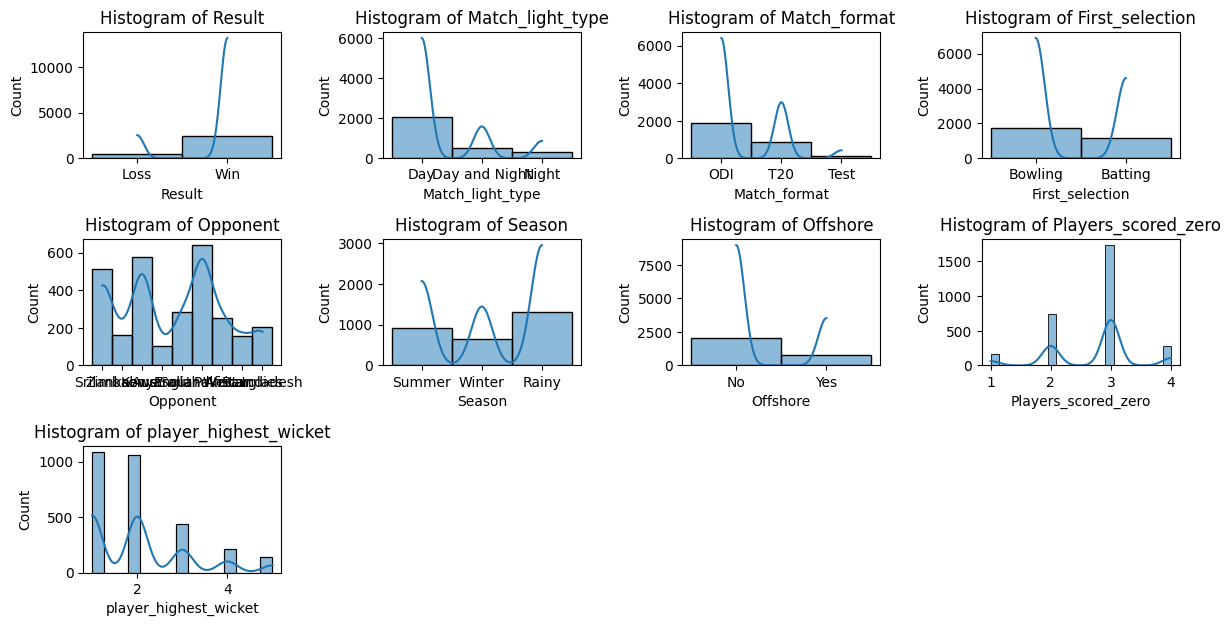

In [23]:
plt.figure(figsize=(12,8))
feature_list=df_obj.columns
for i in range(len(feature_list)):
  plt.subplot(4,4,i+1)
  sns.histplot(x=df[feature_list[i]],data=df,kde=True)
  plt.title('Histogram of {}'.format(feature_list[i]))
  plt.tight_layout()

In [24]:
df['Avg_team_Age'].describe()

count    2833.000000
mean       29.242852
std         2.264230
min        12.000000
25%        30.000000
50%        30.000000
75%        30.000000
max        70.000000
Name: Avg_team_Age, dtype: float64

In [25]:
df.sort_values(by='Avg_team_Age',ascending=False).head(5)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
770,Game_771,Win,70.0,Day,ODI,4.0,1,3.0,Bowling,Srilanka,...,21.0,4,7.0,2,3.0,6.0,0,94.0,3,1
899,Game_900,Win,70.0,Day and Night,ODI,3.0,1,1.0,Bowling,Srilanka,...,18.0,1,24.0,2,3.0,24.0,9,97.0,3,3
831,Game_832,Win,69.0,Night,ODI,4.0,1,3.0,Bowling,England,...,12.0,4,6.0,2,3.0,6.0,4,90.0,1,2
975,Game_976,Win,50.0,Day,ODI,3.0,1,3.0,Batting,England,...,20.0,3,11.0,2,3.0,6.0,4,43.0,1,2
1469,Game_1470,Win,30.0,Day,ODI,4.0,1,NaN,Bowling,Pakistan,...,14.0,2,29.0,3,3.0,8.0,7,35.0,3,3


In [26]:
df.sort_values(by='Avg_team_Age',ascending=True).head(5)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
112,Game_113,Loss,12.0,Day,ODI,1.0,1,4.0,Bowling,Kenya,...,23.0,1,1.0,2,3.0,6.0,0,75.0,3,1
58,Game_59,Loss,17.0,Day and Night,T20,1.0,1,1.0,Batting,Zimbabwe,...,11.0,3,3.0,0,3.0,6.0,2,99.0,2,1
0,Game_1,Loss,18.0,Day,ODI,3.0,1,3.0,Bowling,Srilanka,...,13.0,3,0.0,2,3.0,6.0,0,54.0,3,1
125,Game_126,Win,24.0,Day,ODI,1.0,1,NaN,Batting,Srilanka,...,13.0,3,3.0,3,1.0,6.0,2,51.0,3,1
126,Game_127,Win,24.0,Day,ODI,2.0,1,4.0,Bowling,Srilanka,...,13.0,3,5.0,6,4.0,6.0,2,78.0,3,1


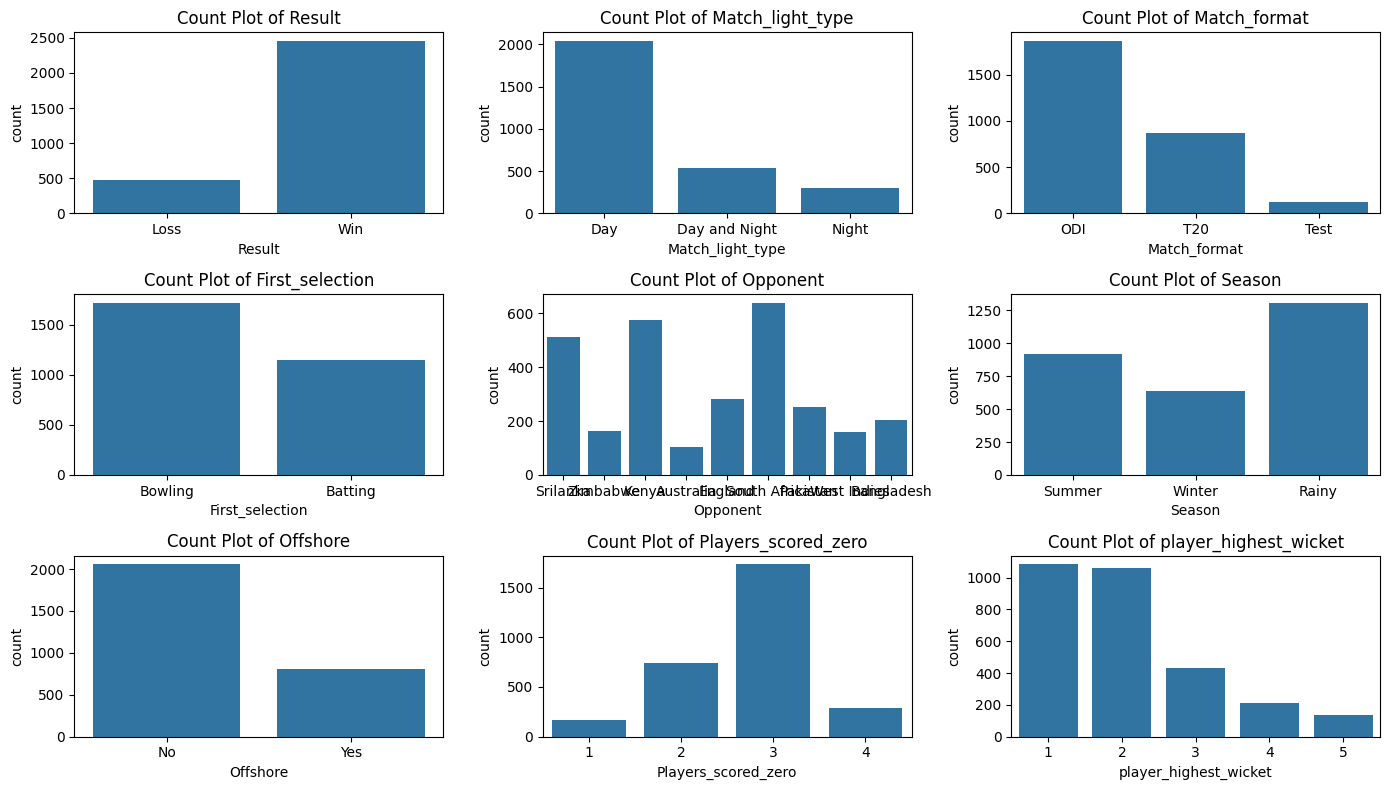

In [27]:
plt.figure(figsize=(14,8))
feature_list=df_obj.columns
for i in range(len(feature_list)):
  plt.subplot(3,3,i+1)
  sns.countplot(x=df[feature_list[i]],data=df)
  plt.title('Count Plot of {}'.format(feature_list[i]))
  plt.tight_layout()

In [28]:
df['Max_run_scored_1over'].describe()

count    2902.000000
mean       15.199862
std         3.661010
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: Max_run_scored_1over, dtype: float64

In [29]:
df['Extra_bowls_bowled'].describe()

count    2901.000000
mean       11.252671
std         7.780829
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: Extra_bowls_bowled, dtype: float64

In [30]:
df.sort_values(by='Extra_bowls_bowled',ascending = False).head(10)

,Game_number,Result,Avg_team_Age,Match_light_type,Match_format,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,First_selection,Opponent,...,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,Max_run_given_1over,extra_bowls_opponent,player_highest_run,Players_scored_zero,player_highest_wicket
1112,Game_1113,Loss,30.0,Day,ODI,4.0,1,4.0,Bowling,West Indies,...,12.0,4,40.0,2,3.0,31.0,15,31.0,3,5
752,Game_753,Loss,30.0,Day,ODI,4.0,1,4.0,Batting,Pakistan,...,12.0,4,40.0,3,2.0,40.0,10,94.0,3,3
2256,Game_2257,Loss,30.0,Day,ODI,4.0,1,4.0,Bowling,West Indies,...,12.0,4,40.0,2,3.0,31.0,15,31.0,3,5
1896,Game_1897,Loss,30.0,Day,ODI,4.0,1,4.0,Batting,Pakistan,...,12.0,4,40.0,3,2.0,40.0,10,94.0,3,3
1874,Game_1875,Win,30.0,Day,T20,4.0,1,4.0,Bowling,South Africa,...,13.0,3,38.0,0,2.0,37.0,10,37.0,3,4
730,Game_731,Win,30.0,Day,T20,4.0,1,4.0,Bowling,South Africa,...,13.0,3,38.0,0,2.0,37.0,10,37.0,3,4
2148,Game_2149,Win,30.0,Day,T20,5.0,1,1.0,Batting,Bangladesh,...,23.0,4,37.0,0,3.0,10.0,9,83.0,3,4
1864,Game_1865,Win,30.0,Day,ODI,3.0,1,4.0,Bowling,England,...,11.0,1,37.0,3,2.0,6.0,4,49.0,1,3
2013,Game_2014,Win,30.0,Day,ODI,3.0,1,4.0,Bowling,Bangladesh,...,14.0,3,37.0,2,3.0,36.0,10,81.0,3,5
2809,Game_2810,Win,30.0,Night,T20,NaN,1,2.0,Bowling,Bangladesh,...,22.0,4,37.0,0,2.0,16.0,9,52.0,3,4


<ipython-input-31-682dd26b59e7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(),  annot=True)


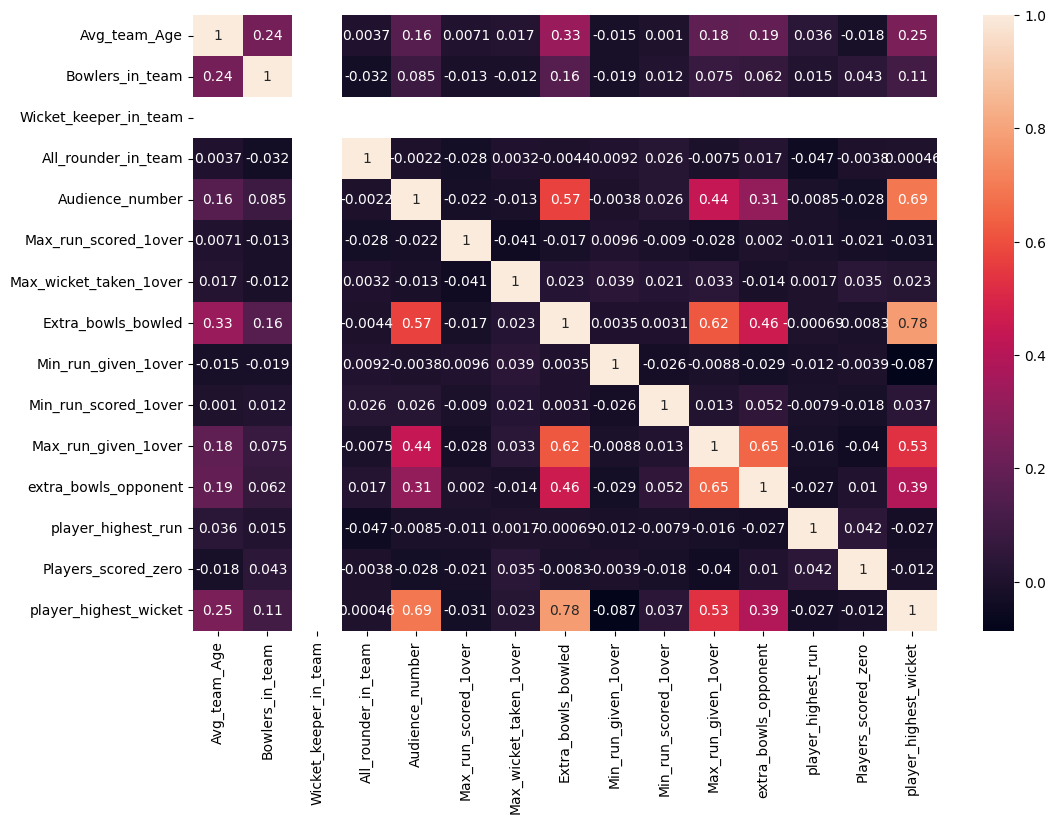

In [31]:
plt.figure(figsize=(12,8))
heatmap = sns.heatmap(df.corr(),  annot=True)

In [32]:
ct = pd.crosstab(df['Result'], df['Match_format'])
ct

Match_format,ODI,T20,Test
Result,,,
Loss,258,180,24
Win,1607,690,101


In [33]:
df['Wicket_keeper_in_team'].value_counts()

1    2930
Name: Wicket_keeper_in_team, dtype: int64

In [34]:
cross_tab=pd.crosstab(df['Result'],df['Match_format'])
cross_tab

Match_format,ODI,T20,Test
Result,,,
Loss,258,180,24
Win,1607,690,101


In [35]:
ct = pd.crosstab(df['Result'], df['Match_format'],margins=True,normalize='columns')
ct

Match_format,ODI,T20,Test,All
Result,,,,
Loss,0.138338,0.206897,0.192,0.161538
Win,0.861662,0.793103,0.808,0.838462


In [36]:
df['Result'].value_counts()

Win     2457
Loss     473
Name: Result, dtype: int64

In [37]:
ct = pd.crosstab(df['Result'], df['Match_format'],values=df['Audience_number'], aggfunc='median',margins=True)
ct

Match_format,ODI,T20,Test,All
Result,,,,
Loss,19379.5,37128.0,17948.0,22414.0
Win,33068.0,42203.0,34552.0,36428.0
All,30740.5,40152.0,27202.0,34510.0


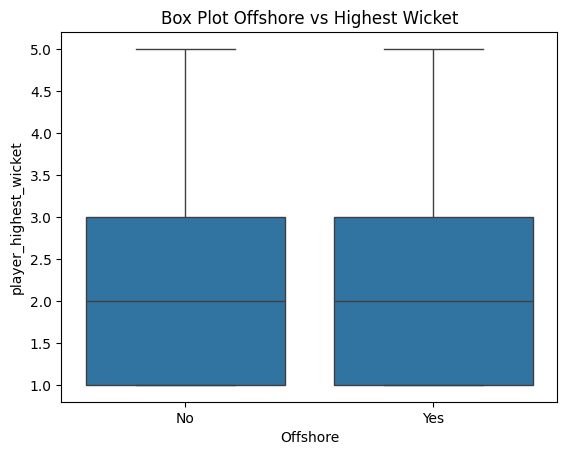

In [38]:
plt.title('Box Plot Offshore vs Highest Wicket')
sns.boxplot(y=df['player_highest_wicket'],x=df['Offshore'],data=df);

<Axes: title={'center': 'Opponent vs Highest Wicket'}, xlabel='Opponent', ylabel='player_highest_wicket'>

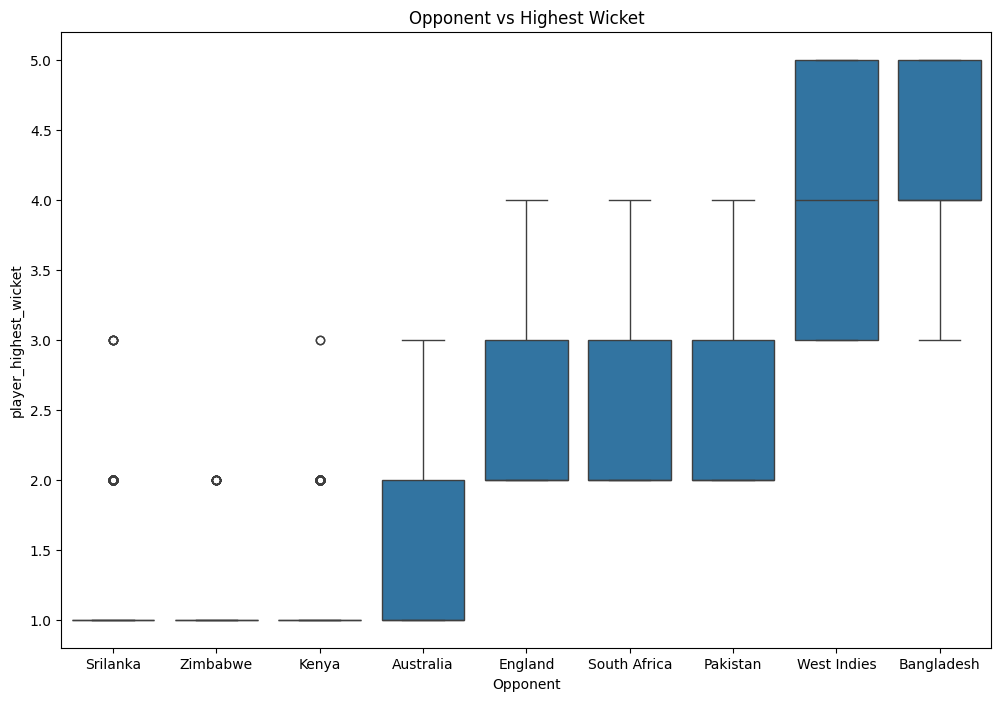

In [39]:
plt.figure(figsize=(12,8))
plt.title('Opponent vs Highest Wicket')
sns.boxplot(x=df['Opponent'],y=df['player_highest_wicket'],data=df)

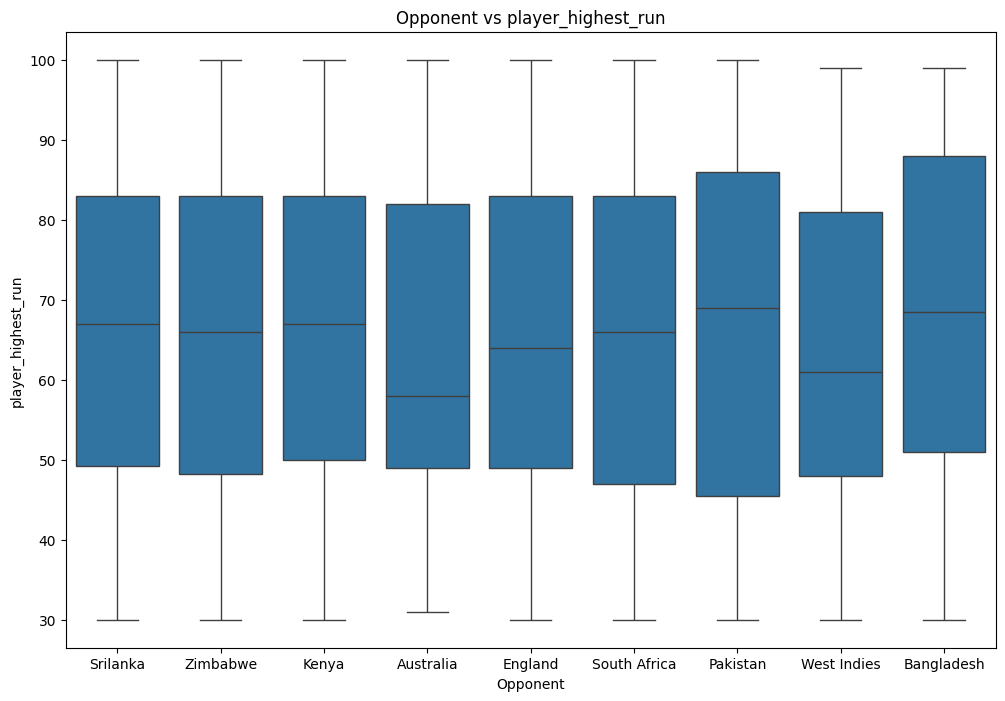

In [40]:
plt.figure(figsize=(12,8))
plt.title('Opponent vs player_highest_run')
sns.boxplot(x=df['Opponent'],y=df['player_highest_run'],data=df);

<Axes: title={'center': 'Highest Run vs Australia against Result'}, xlabel='Result', ylabel='player_highest_run'>

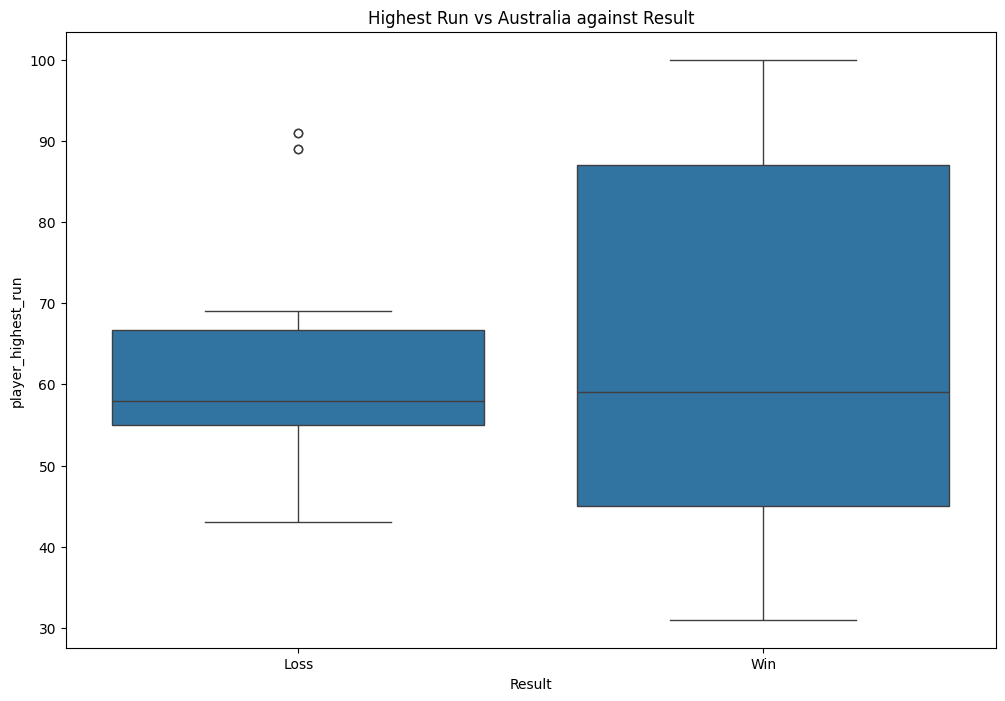

In [41]:
aus= df[df['Opponent'] == 'Australia']
plt.figure(figsize=(12, 8))
plt.title('Highest Run vs Australia against Result')
sns.boxplot(y=aus['player_highest_run'],x=aus['Result'], data=aus)

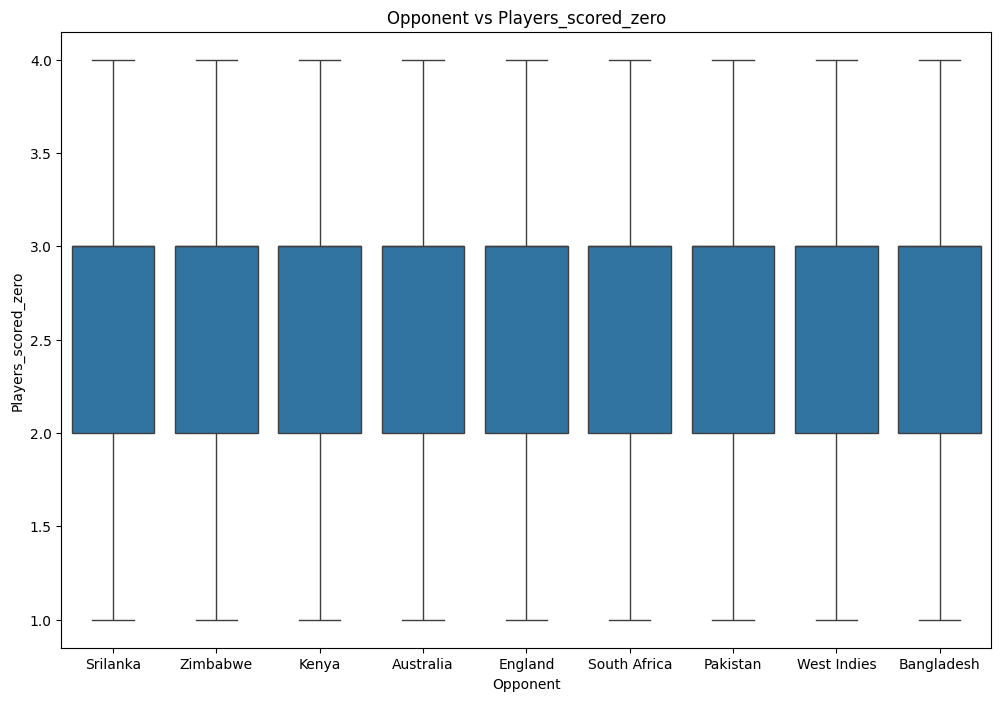

In [42]:
plt.figure(figsize=(12,8))
plt.title('Opponent vs Players_scored_zero')
sns.boxplot(x=df['Opponent'],y=df['Players_scored_zero'],data=df);

In [43]:
for column in df_objd.columns:
  df[column].fillna(df[column].median(),inplace=True)

In [44]:
for column in df_obj.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [45]:
df['Match_light_type'].fillna('Day', inplace=True)

In [46]:
df.isnull().sum()

Game_number               0
Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

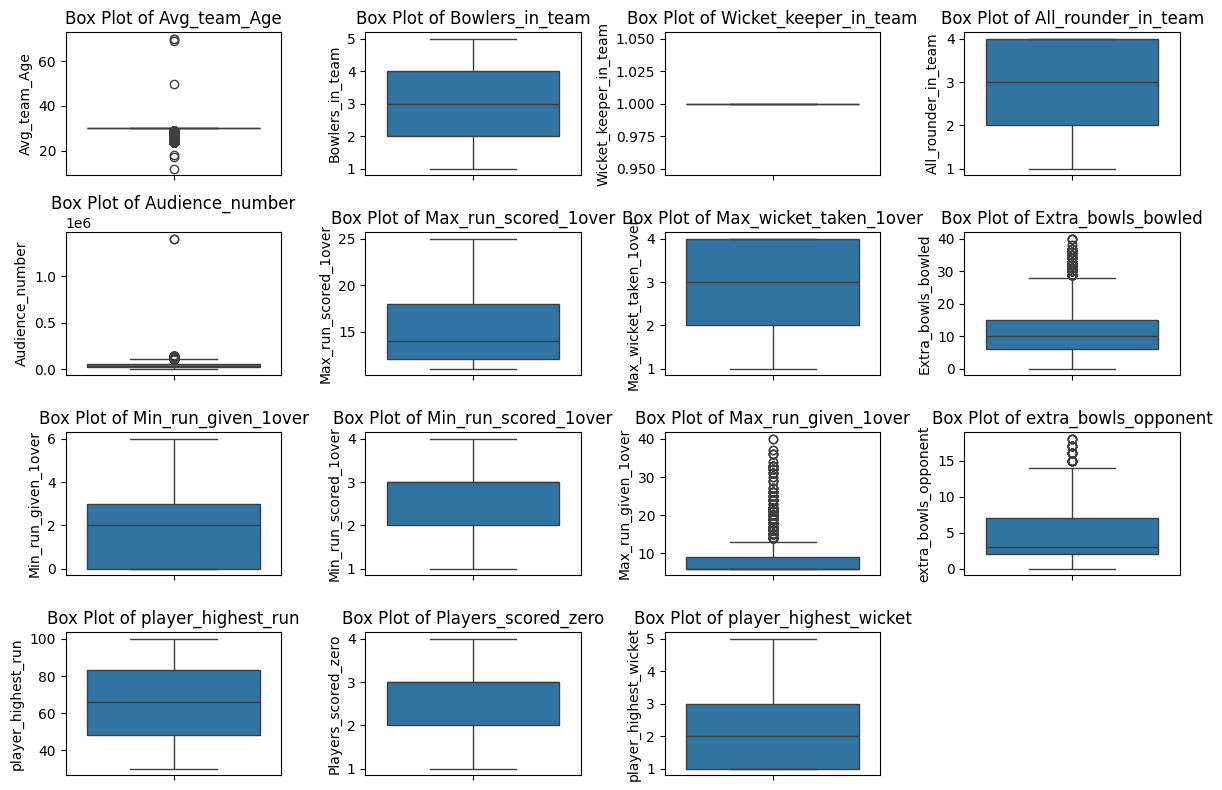

In [47]:
plt.figure(figsize=(12,8))
feature_list=df_objd.columns
for i in range(len(feature_list)):
  plt.subplot(4,4,i+1)
  sns.boxplot(y=df[feature_list[i]],data=df)
  plt.title('Box Plot of {}'.format(feature_list[i]))
  plt.tight_layout()

In [48]:
df.to_csv('/content/drive/MyDrive/car/Untitled folder/new.csv',index=True)

<Axes: title={'center': 'Opponent vs Players_highest_run in Wins'}, xlabel='Opponent', ylabel='player_highest_run'>

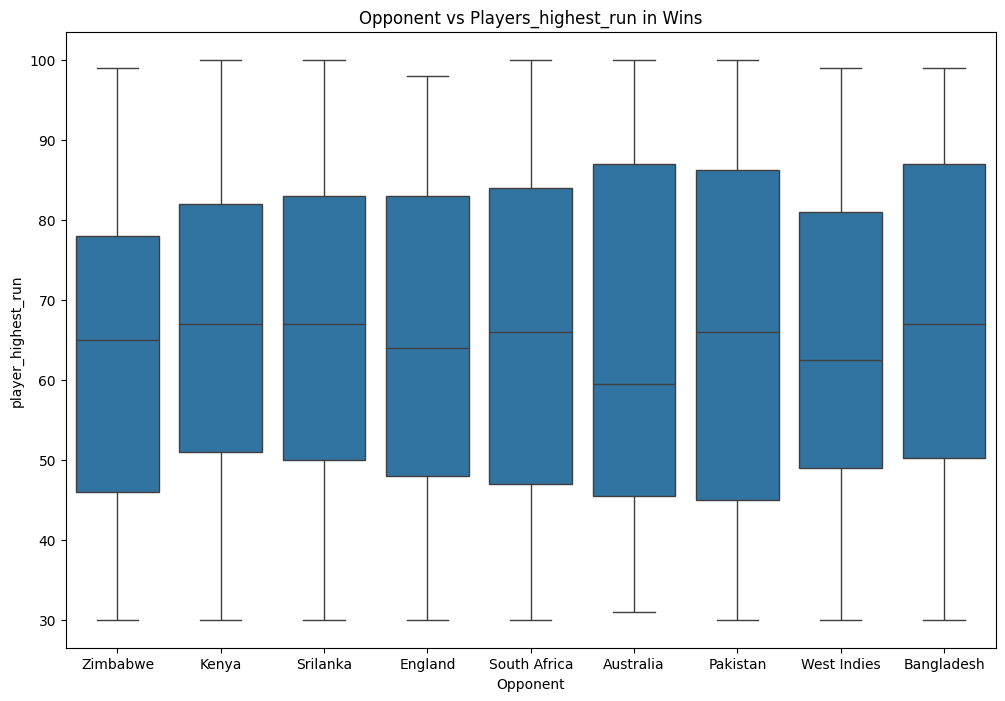

In [49]:
plt.figure(figsize=(12,8))
plt.title('Opponent vs Players_highest_run in Wins')
sns.boxplot(x='Opponent',y='player_highest_run',data=df[df['Result']=='Win'])

<Axes: title={'center': 'Opponent vs Players_highest_run in Loses'}, xlabel='Opponent', ylabel='player_highest_run'>

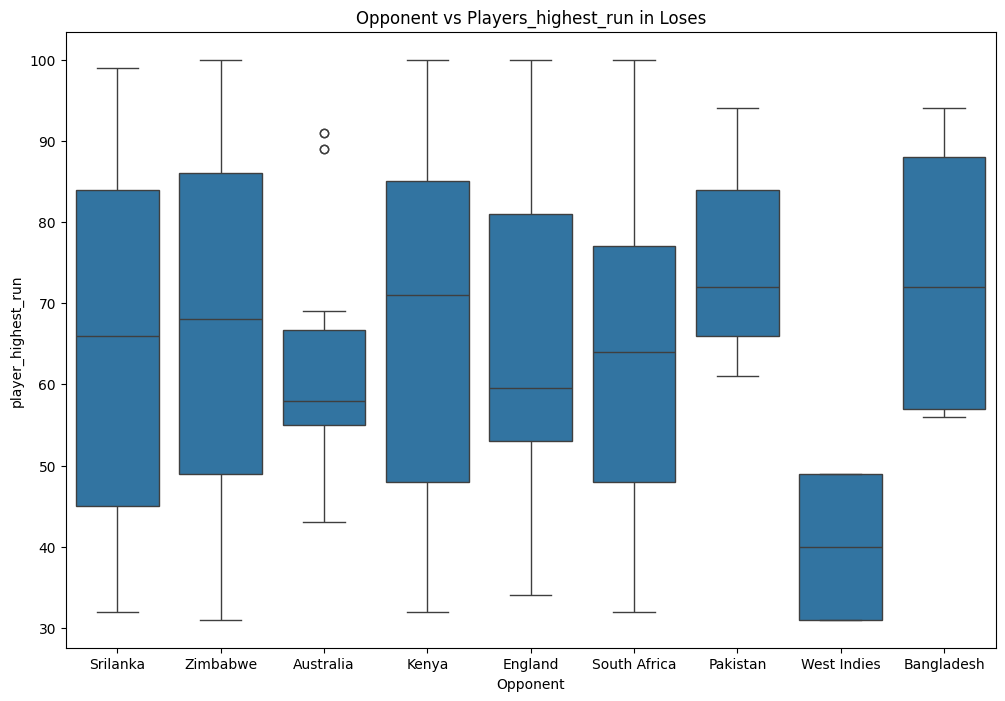

In [50]:
plt.figure(figsize=(12,8))
plt.title('Opponent vs Players_highest_run in Loses')
sns.boxplot(x='Opponent',y='player_highest_run',data=df[df['Result']=='Loss'])

<Axes: title={'center': 'Opponent vs Players_highest_run vs Result'}, xlabel='Opponent', ylabel='player_highest_run'>

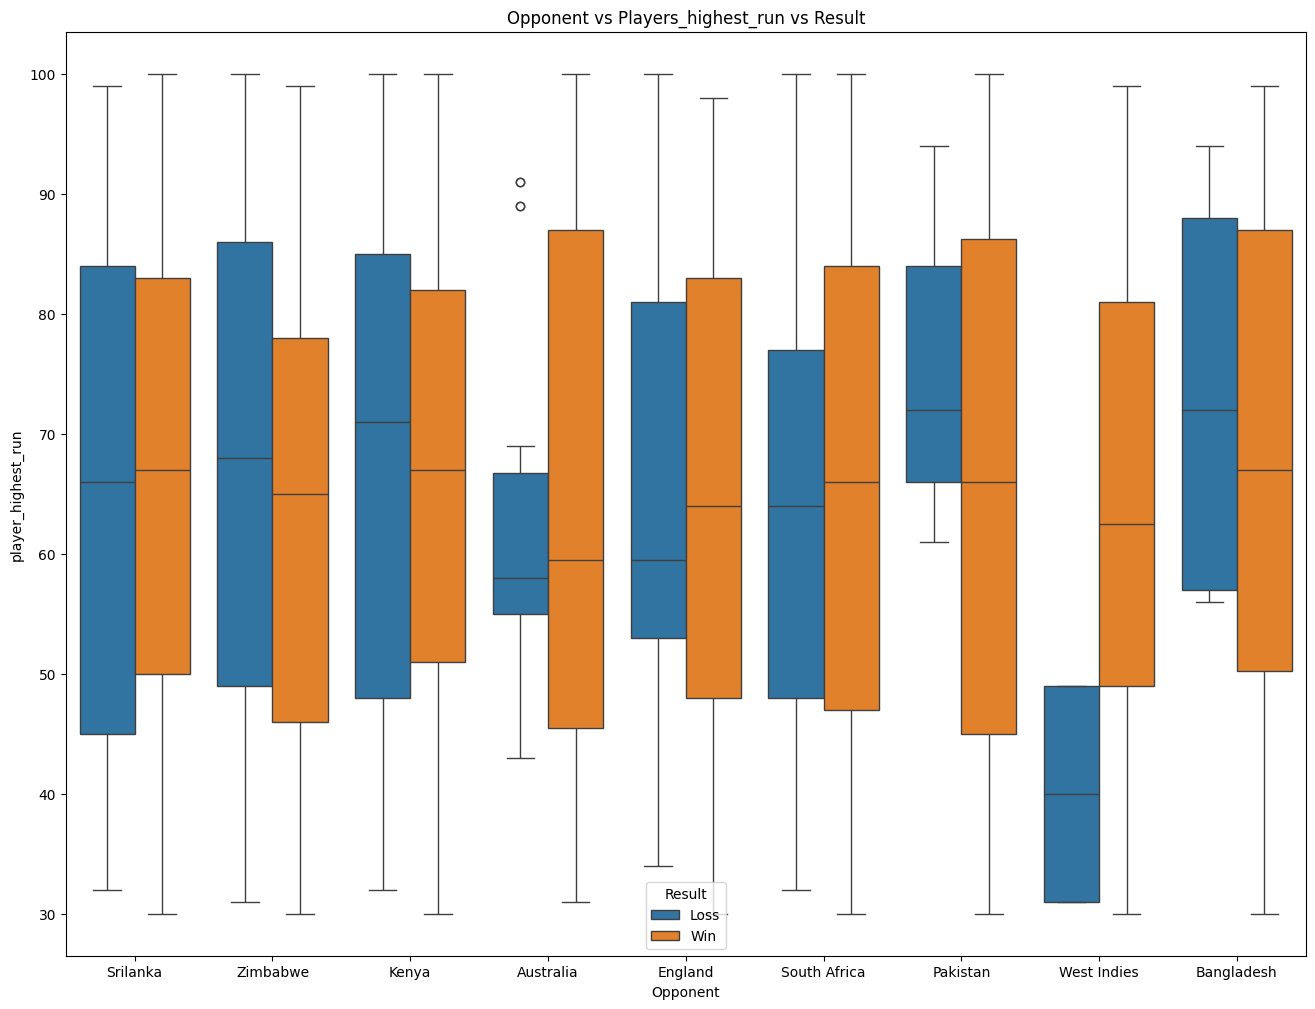

In [51]:
plt.figure(figsize=(16,12))
plt.title('Opponent vs Players_highest_run vs Result')
plt.legend(loc='upper right')
sns.boxplot(x='Opponent',y='player_highest_run',hue='Result', data=df)

<Axes: title={'center': 'Opponent vs Players_highest_run vs Result'}, xlabel='Opponent', ylabel='player_highest_run'>

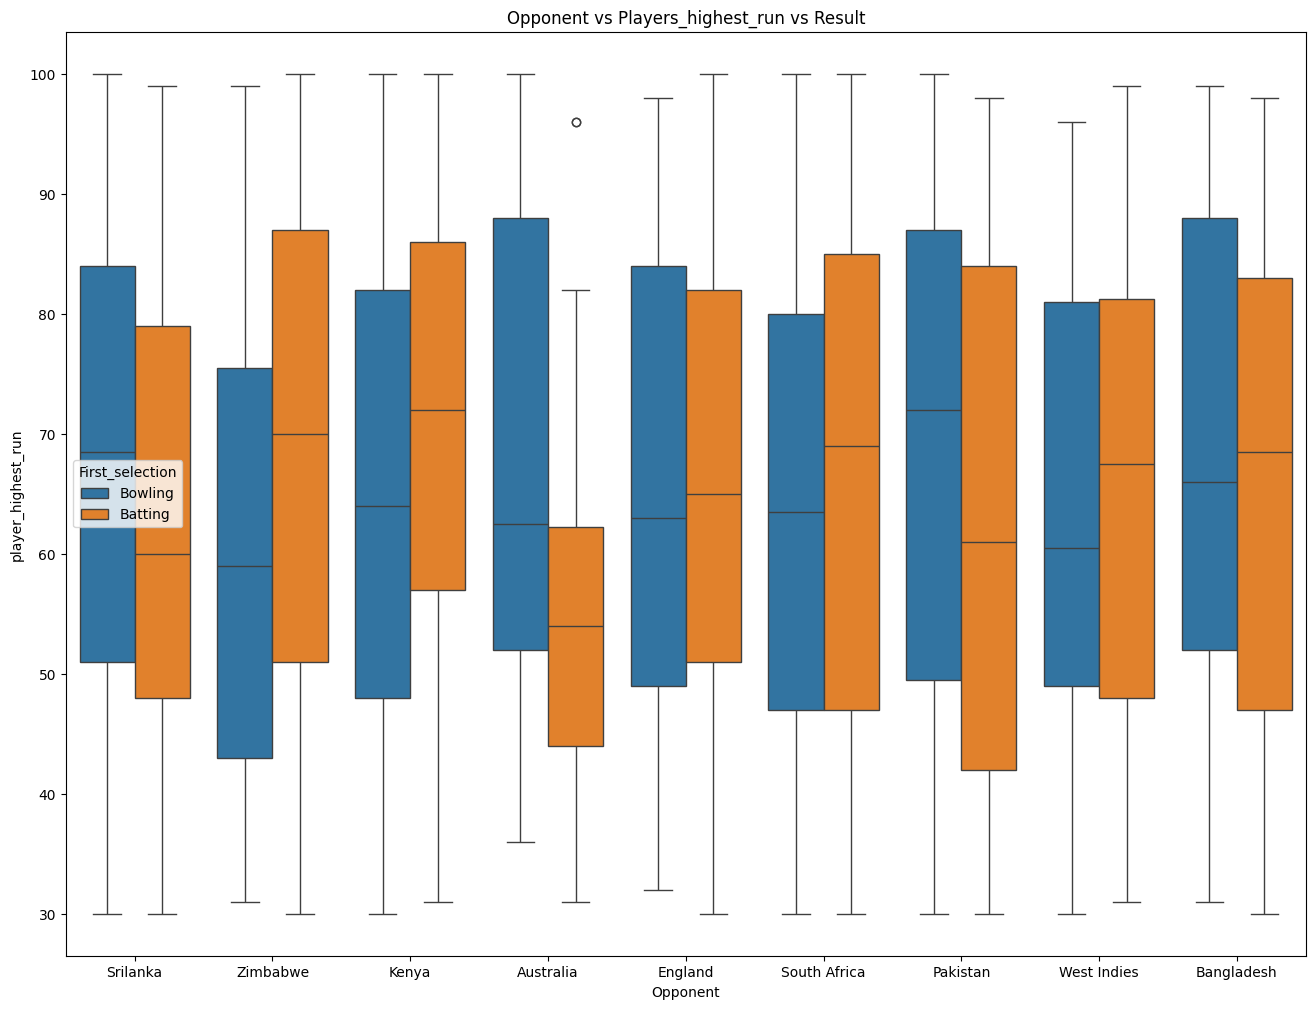

In [52]:
plt.figure(figsize=(16,12))
plt.title('Opponent vs Players_highest_run vs Result')
plt.legend(loc='upper right')
sns.boxplot(x='Opponent',y='player_highest_run',hue='First_selection', data=df)

In [53]:
df_obj.head(5)

,Result,Match_light_type,Match_format,First_selection,Opponent,Season,Offshore,Players_scored_zero,player_highest_wicket
0,Loss,Day,ODI,Bowling,Srilanka,Summer,No,3,1
1,Win,Day,T20,Batting,Zimbabwe,Summer,No,2,1
2,Loss,Day and Night,T20,Bowling,Zimbabwe,NaN,Yes,3,1
3,Win,NaN,ODI,Bowling,Kenya,Summer,No,3,1
4,Loss,Night,ODI,Bowling,Srilanka,Summer,No,3,1


In [54]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Result                 2930 non-null   object
 1   Match_light_type       2878 non-null   object
 2   Match_format           2860 non-null   object
 3   First_selection        2871 non-null   object
 4   Opponent               2894 non-null   object
 5   Season                 2868 non-null   object
 6   Offshore               2866 non-null   object
 7   Players_scored_zero    2930 non-null   object
 8   player_highest_wicket  2930 non-null   object
dtypes: object(9)
memory usage: 206.1+ KB


In [55]:
df_obj.drop(['Players_scored_zero','player_highest_wicket'],axis=1,inplace=True)

In [56]:
df[df_objd.columns] = df[df_objd.columns].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [57]:
df =pd.get_dummies(df, columns=df_obj.columns,drop_first=True)

In [58]:
df.drop(['Game_number'],axis=1,inplace=True)
df

,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,...,Opponent_England,Opponent_Kenya,Opponent_Pakistan,Opponent_South Africa,Opponent_Srilanka,Opponent_West Indies,Opponent_Zimbabwe,Season_Summer,Season_Winter,Offshore_Yes
0,0.103448,0.50,NaN,0.666667,0.002066,0.142857,0.666667,0.00,0.333333,0.666667,...,0,0,0,0,1,0,0,1,0,0
1,0.206897,0.50,NaN,1.000000,0.000960,0.071429,0.000000,0.00,0.000000,0.666667,...,0,0,0,0,0,0,1,1,0,0
2,0.206897,0.50,NaN,0.333333,0.004367,0.214286,1.000000,0.00,0.000000,0.666667,...,0,0,0,0,0,0,1,0,0,1
3,0.206897,0.25,NaN,0.333333,0.000211,0.285714,1.000000,0.00,0.333333,0.666667,...,0,1,0,0,0,0,0,1,0,0
4,0.206897,0.00,NaN,0.666667,0.004498,0.071429,1.000000,0.00,0.000000,0.666667,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0.310345,0.50,NaN,1.000000,0.019303,0.285714,0.666667,0.20,0.000000,0.666667,...,0,0,0,1,0,0,0,1,0,0
2926,0.310345,0.75,NaN,0.666667,0.009046,0.214286,1.000000,0.20,0.333333,0.666667,...,0,1,0,0,0,0,0,1,0,0
2927,0.310345,0.75,NaN,0.666667,0.023520,0.214286,1.000000,0.25,0.333333,1.000000,...,0,0,1,0,0,0,0,0,0,1
2928,0.310345,0.75,NaN,0.666667,0.004985,0.214286,0.333333,0.50,0.333333,0.666667,...,0,1,0,0,0,0,0,0,0,0


In [59]:
from sklearn.model_selection import train_test_split
X=df.drop('Result_Win',axis=1)
y=df['Result_Win']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [60]:
X_train.head()

,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,...,Opponent_England,Opponent_Kenya,Opponent_Pakistan,Opponent_South Africa,Opponent_Srilanka,Opponent_West Indies,Opponent_Zimbabwe,Season_Summer,Season_Winter,Offshore_Yes
608,0.293103,0.25,NaN,0.666667,0.019590,0.928571,0.666667,0.250,0.500000,0.666667,...,0,1,0,0,0,0,0,0,0,0
348,0.258621,0.75,NaN,0.666667,0.009056,0.214286,0.333333,0.100,0.333333,0.666667,...,0,0,0,0,1,0,0,0,0,0
2844,0.310345,0.75,NaN,1.000000,0.006523,0.857143,0.333333,0.125,0.333333,0.666667,...,0,1,0,0,0,0,0,0,0,1
1624,0.310345,0.50,NaN,0.000000,0.037968,0.642857,0.666667,0.275,0.000000,0.333333,...,0,0,0,1,0,0,0,1,0,1
612,0.293103,0.50,NaN,1.000000,0.007011,0.642857,0.666667,0.075,0.833333,0.666667,...,0,1,0,0,0,0,0,1,0,1


In [61]:
X_test.head()

,Avg_team_Age,Bowlers_in_team,Wicket_keeper_in_team,All_rounder_in_team,Audience_number,Max_run_scored_1over,Max_wicket_taken_1over,Extra_bowls_bowled,Min_run_given_1over,Min_run_scored_1over,...,Opponent_England,Opponent_Kenya,Opponent_Pakistan,Opponent_South Africa,Opponent_Srilanka,Opponent_West Indies,Opponent_Zimbabwe,Season_Summer,Season_Winter,Offshore_Yes
2126,0.310345,0.50,NaN,0.666667,0.005468,0.285714,0.666667,0.225,0.500000,0.000000,...,0,0,0,0,1,0,0,0,0,0
192,0.206897,0.50,NaN,0.000000,0.005709,0.214286,1.000000,0.075,0.333333,0.666667,...,0,0,0,0,0,0,0,0,0,0
2406,0.310345,0.75,NaN,0.000000,0.046803,0.642857,1.000000,0.350,1.000000,0.666667,...,0,0,1,0,0,0,0,0,0,0
45,0.206897,0.50,NaN,1.000000,0.009634,0.500000,0.333333,0.025,0.833333,0.666667,...,0,0,0,0,1,0,0,1,0,1
2477,0.310345,0.50,NaN,0.000000,0.008905,0.142857,0.333333,0.375,0.833333,0.666667,...,0,1,0,0,0,0,0,0,0,0


In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
X = df.drop(['Result_Win','Wicket_keeper_in_team'], axis=1)
y = df['Result_Win']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [65]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [66]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [67]:
from sklearn.linear_model import LogisticRegression
log_mod=LogisticRegression()
log_mod.fit(X_train,y_train)

LogisticRegression()

In [68]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = log_mod.predict(X_train)
model_score = log_mod.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8722574353973671
[[ 101  228]
 [  34 1688]]
              precision    recall  f1-score   support

           0       0.75      0.31      0.44       329
           1       0.88      0.98      0.93      1722

    accuracy                           0.87      2051
   macro avg       0.81      0.64      0.68      2051
weighted avg       0.86      0.87      0.85      2051



In [69]:
y_test_predict = log_mod.predict(X_test)
model_score = log_mod.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8577929465301479
[[ 40 104]
 [ 21 714]]
              precision    recall  f1-score   support

           0       0.66      0.28      0.39       144
           1       0.87      0.97      0.92       735

    accuracy                           0.86       879
   macro avg       0.76      0.62      0.65       879
weighted avg       0.84      0.86      0.83       879



In [70]:
log_mod.fit(X_train_res, y_train_res)

LogisticRegression()

In [71]:
y_train_predict_res = log_mod.predict(X_train_res)
model_score = log_mod.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict_res))
print(metrics.classification_report(y_train_res, y_train_predict_res))

0.7546457607433217
[[1319  403]
 [ 442 1280]]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1722
           1       0.76      0.74      0.75      1722

    accuracy                           0.75      3444
   macro avg       0.75      0.75      0.75      3444
weighted avg       0.75      0.75      0.75      3444



In [72]:
y_test_predict = log_mod.predict(X_test)
model_score = log_mod.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.745164960182025
[[104  40]
 [184 551]]
              precision    recall  f1-score   support

           0       0.36      0.72      0.48       144
           1       0.93      0.75      0.83       735

    accuracy                           0.75       879
   macro avg       0.65      0.74      0.66       879
weighted avg       0.84      0.75      0.77       879



AUC: 0.820


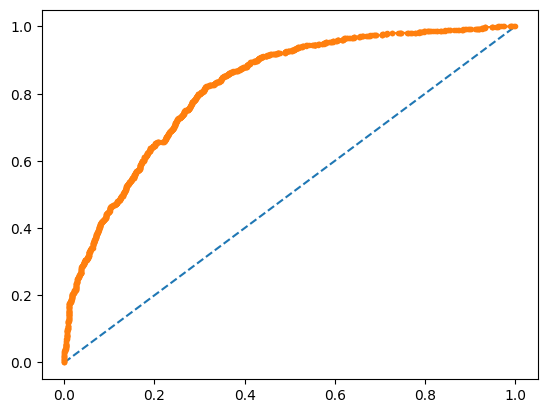

In [73]:
probs = Log_model.predict_proba(X_train_res)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.818


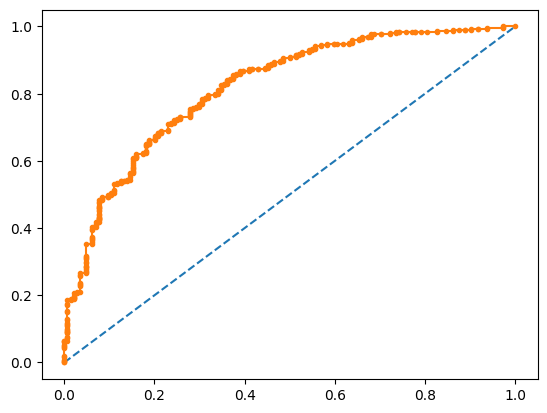

In [80]:
probs = log_mod.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

**Bagging Model**

In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train_res, y_train_res)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [84]:
y_train_predict=Bagging_model.predict(X_train_res)
model_score=Bagging_model.score(X_train_res,y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res,y_train_predict))
print(metrics.classification_report(y_train_res,y_train_predict))

1.0
[[1722    0]
 [   0 1722]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1722
           1       1.00      1.00      1.00      1722

    accuracy                           1.00      3444
   macro avg       1.00      1.00      1.00      3444
weighted avg       1.00      1.00      1.00      3444



In [85]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.9306029579067122
[[107  37]
 [ 24 711]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       144
           1       0.95      0.97      0.96       735

    accuracy                           0.93       879
   macro avg       0.88      0.86      0.87       879
weighted avg       0.93      0.93      0.93       879



AUC: 1.000


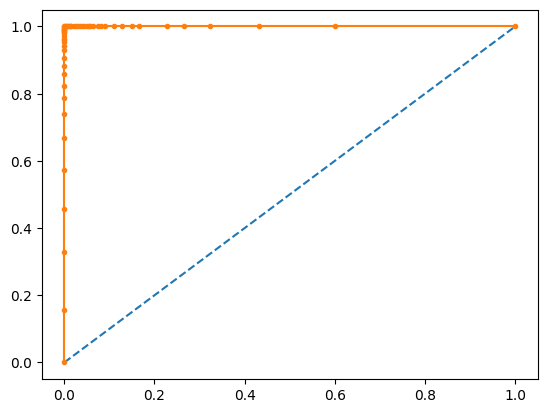

In [86]:
probs = Bagging_model.predict_proba(X_train_res)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.966


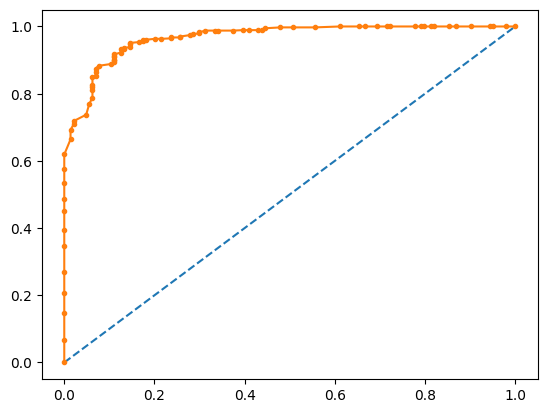

In [87]:
probs = Bagging_model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()